In [1]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.colors as colors
import numpy as np 
from pathlib import Path
import numpy.linalg as npl
import os

import sys
os.chdir('../')
from gen_geom import geom
msh = geom()
from gen_obs import obs 
obs = obs()
xv, yv = np.meshgrid(msh.x, msh.y, sparse=True, indexing="ij")

import pherosensor
from source_localization.control import Control

path_case = os.getcwd()
path_data = path_case + '/data'

In [2]:
colors_dic = {
    'no reg':                '#377eb8',   #'blue'   
    'reg pop dyn':           '#ff7f00',   #'orange'  
    'reg T':                 '#4daf4a',   #'green'   
    'reg LASSO':             '#f781bf',   #'pink'   
    'reg group LASSO':       '#dede00',   #'yellow'  
    'reg pop dyn + LASSO':   '#a65628',   #'brown'   
    'reg T + LASSO':         '#984ea3',   #'purple'  
    'reg pop dyn + T':       '#999999',   #'gray'    
    'all reg':               '#e41a1c',   #'red'     
} 

In [3]:
S_value = np.load(Path(path_data) / 'S_target.npy')
ctrl_target_current_t = np.copy(S_value[0, :, :])

In [4]:
X_sensor = np.copy(obs.X_sensors) # np.unique(X_obs, axis=0
colors = ['b', 'g', 'm', 'r']
symbols = ['o', 's', '*', 'X', 'P', 'D', 'v', '^', '<', '>', 'p', 'h']

is_z1 = 0
is_z2 = 0
is_z3 = 0
is_z4 = 0

colors_symbols_list=[]
for i, X in enumerate(X_sensor):
    if X[0]<0.5*np.max(msh.x) and X[1]<0.5*np.max(msh.y):
        colors_symbols_list.append(colors[0]+symbols[is_z1])
        is_z1 += 1
    if X[0]<0.5*np.max(msh.x) and X[1]>0.5*np.max(msh.y):
        colors_symbols_list.append(colors[1]+symbols[is_z2])
        is_z2 += 1
    if X[0]>0.5*np.max(msh.x) and X[1]<0.5*np.max(msh.y):
        colors_symbols_list.append(colors[2]+symbols[is_z3])
        is_z3 += 1
    if X[0]>0.5*np.max(msh.x) and X[1]>0.5*np.max(msh.y):
        colors_symbols_list.append(colors[3]+symbols[is_z4])
        is_z4 += 1
colors_symbols = np.array(colors_symbols_list)

# No reg

In [5]:
path_output = path_case + '/output_noreg'
Linf_norm_mono_sensor_adjoint_states_noreg = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
no_reg = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_noreg,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_noreg)[::-1],
    "ls": colors_dic['no reg'], 
    "label": "no reg"
}

# reg PD

In [6]:
path_output = path_case + '/output_regPD'
Linf_norm_mono_sensor_adjoint_states_reg_PD = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_PD = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_PD,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_PD)[::-1],
    "ls": colors_dic['reg pop dyn'], 
    'label': 'PD'
}

# reg LASSO

In [7]:
path_output = path_case + '/output_regLASSO'
Linf_norm_mono_sensor_adjoint_states_reg_LASSO = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_LASSO = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_LASSO,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_LASSO)[::-1],
    "ls": colors_dic['reg LASSO'] ,
    'label': 'LASSO'
}

# reg T

In [8]:
path_output = path_case + '/output_regT'
Linf_norm_mono_sensor_adjoint_states_reg_T = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_T = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_T,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_T)[::-1],
    "ls": colors_dic['reg T'], 
    'label': 'T'
}

# reg PD+LASSO

In [9]:
path_output = path_case + '/output_regPDLASSO'
Linf_norm_mono_sensor_adjoint_states_reg_PDLASSO = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_PDLASSO = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_PDLASSO,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_PDLASSO)[::-1],
    "ls": colors_dic['reg pop dyn + LASSO'], 
    'label': 'PD+LASSO'
}

# reg T+LASSO

In [10]:
path_output = path_case + '/output_regLASSOT'
Linf_norm_mono_sensor_adjoint_states_reg_LASSOT = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_LASSOT = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_LASSOT,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_LASSOT)[::-1],
    "ls": colors_dic['reg T + LASSO'], 
    'label': 'T+LASSO'
}

# reg T+PD

In [11]:
path_output = path_case + '/output_regPDT'
Linf_norm_mono_sensor_adjoint_states_reg_PDT = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
reg_PDT = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_reg_PDT,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_reg_PDT)[::-1],
    "ls": colors_dic['reg pop dyn + T'], 
    'label': 'PD+T'
}

# all reg

In [12]:
path_output = path_case + '/output_allreg'
Linf_norm_mono_sensor_adjoint_states_all_reg = np.load(Path(path_output) / 'linf_norm_one_sensor_adjoint_states.npy')
all_reg = {
    "Linf norm mono sensor adjoint states" : Linf_norm_mono_sensor_adjoint_states_all_reg,
    "index sort" : np.argsort(Linf_norm_mono_sensor_adjoint_states_all_reg)[::-1],
    "ls": colors_dic['all reg'], 
    'label': 'all reg'
}

# comparaison différentes reg

In [13]:
dic ={
    'no reg':no_reg, 
    'reg pop dyn':reg_PD, 
    'reg LASSO': reg_LASSO, 
    'reg T': reg_T, 
    'reg PD+LASSO':reg_PDLASSO, 
    'reg T+LASSO':reg_LASSOT,  
    'reg T+PD':reg_PDT, 
    'reg all':all_reg
} 

save_plot_path = 'TO BE DEFINED'

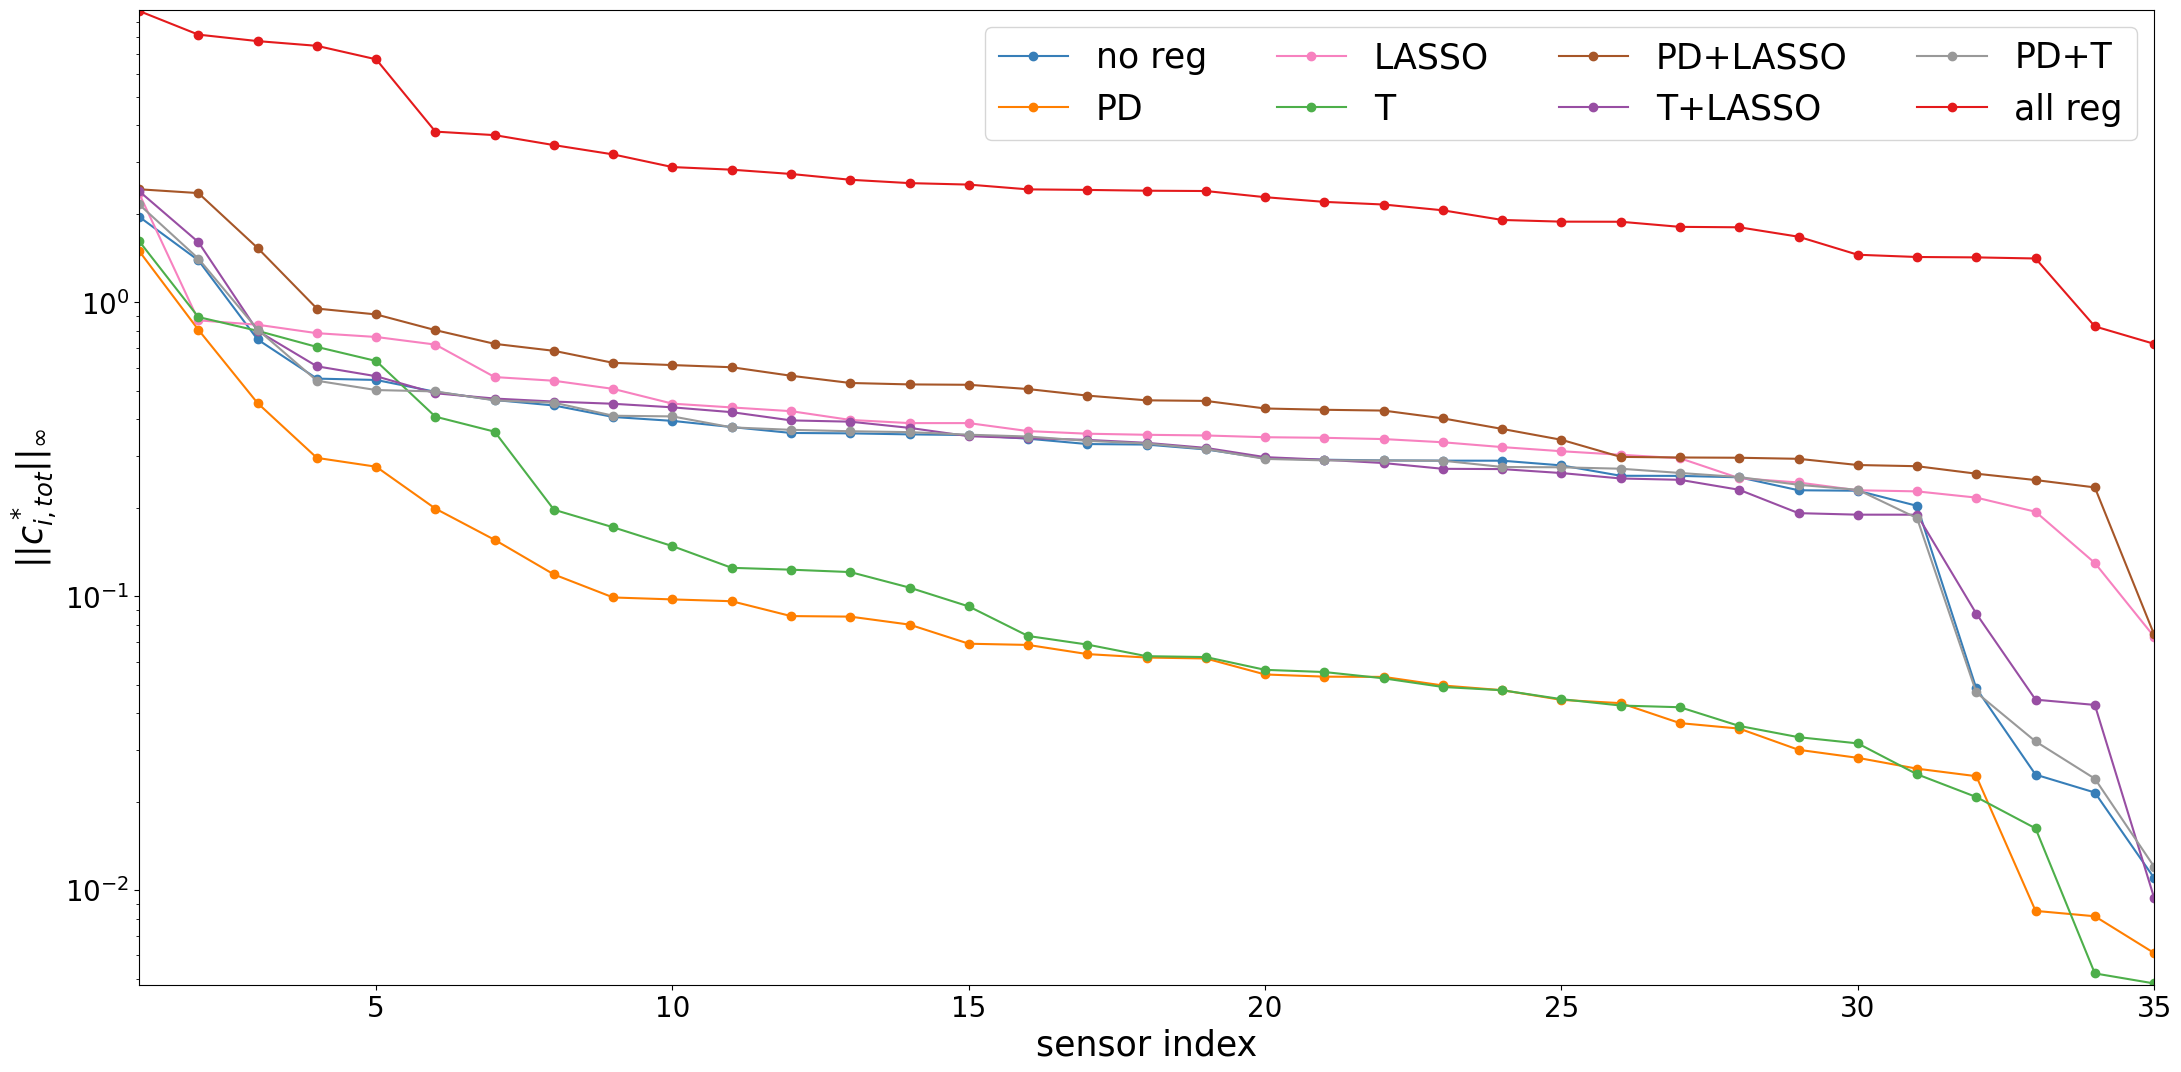

In [14]:
def plot_bump_chart(
    case_dict, 
    sensors_color_symbol,
    save_plot_path = None, 
    name_file = '', 
    file_format = 'pdf'

):
    n_case = len(case_dict.keys())
    n_sensors = sensors_color_symbol.size
    ytick_labels = [case_dict[key]['label'] for key in case_dict.keys()]
    vmin = np.inf 
    vmax = -np.inf 
    fontsize = 25

    fig, ax_top = plt.subplots(1, 1, figsize=(26,15), sharey=True)
    for key in case_dict.keys():
        case = case_dict[key]
        linf_norm = case["Linf norm mono sensor adjoint states"][case["index sort"]]
        ax_top.plot(np.arange(1,n_sensors+1), linf_norm, 'o-', color=case['ls'], label=case['label'])
        vmin = np.min((np.min(linf_norm),vmin))
        vmax = np.max((np.max(linf_norm),vmax))

    ax_top.set_yscale('log')
    ax_top.set_xlabel('sensor index', fontsize=fontsize)
    ax_top.set_ylabel('$\|\|c^*_{i,tot}\|\|_{\infty}$', fontsize=fontsize)
    ax_top.tick_params(labelsize=fontsize - 5)
    ax_top.set_ylim(0.99*vmin, 1.01*vmax)
    ax_top.set_xlim(1,n_sensors)
    ax_top.legend(fontsize=fontsize, ncol=4)
    
    plt.subplots_adjust(wspace=0, top=.76)
    if save_plot_path is None:
        plt.show()
    else: 
        plt.savefig(Path(save_plot_path) / f"{name_file}.{file_format}", format=file_format, bbox_inches="tight")

plot_bump_chart(
    dic, 
    colors_symbols,
    #save_plot_path = save_plot_path, 
    #name_file = 'mono_sensor_total_contrib_inf_norm', 
    #file_format = 'png'
)